## ML. Regression

### House price prediction

Today we will follow a classic problem used to study regression:

> *I want to put my house up for sale, but I don't know at what price. Therefore, I checked the parameters and prices of houses in my area and collected them in a table. Based on this, I want to prepare a linear regression model and estimate the price of my house. How to do it?*

The key point is that the same methods can be used for many other problems, including the analysis of physiological data. You just need to have a continuous variable that you want to predict (e.g., valence and arousal of emotions over the range $[1,9]$ in the BIRAFFE2 set, as we have seen in Stats 101 class).

In [ ]:
# necessary imports
import numpy as np
import pandas as pd

# import matplotlib library
import matplotlib.pyplot as plt
# if you work locally (not at Google Colab) you can activate interactive plots by changing "inline" to "notebook"
%matplotlib inline

# import bokeh
import bokeh.io, bokeh.plotting
bokeh.io.output_notebook()

# for machine learning
import sklearn
from sklearn import linear_model, metrics, model_selection

In [ ]:
# Download the dataset (to Virtual Machine local filesystem)
!wget https://krzysztof.kutt.pl/didactics/psaw/kc_house_data_train.csv
!wget https://krzysztof.kutt.pl/didactics/psaw/kc_house_data_test.csv

--2024-04-02 17:21:29--  https://krzysztof.kutt.pl/didactics/psaw/kc_house_data_train.csv
Resolving krzysztof.kutt.pl (krzysztof.kutt.pl)... 185.255.40.55
Connecting to krzysztof.kutt.pl (krzysztof.kutt.pl)|185.255.40.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2010102 (1.9M) [text/csv]
Saving to: ‘kc_house_data_train.csv’

kc_house_data_train 100%[===================>]   1.92M  2.57MB/s    in 0.7s    

2024-04-02 17:21:31 (2.57 MB/s) - ‘kc_house_data_train.csv’ saved [2010102/2010102]

--2024-04-02 17:21:31--  https://krzysztof.kutt.pl/didactics/psaw/kc_house_data_test.csv
Resolving krzysztof.kutt.pl (krzysztof.kutt.pl)... 185.255.40.55
Connecting to krzysztof.kutt.pl (krzysztof.kutt.pl)|185.255.40.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 502130 (490K) [text/csv]
Saving to: ‘kc_house_data_test.csv’

kc_house_data_test. 100%[===================>] 490.36K   830KB/s    in 0.6s    

2024-04-02 17:21:32 (830 KB/s) - ‘kc_h

**Task 1:** The dataset has already been split into two parts (both were downloaded in the previous cell). We will use the training part (`kc_house_data_train.csv`) to prepare the model. At first, we want to load the dataset and view it. To do this:
1. Load the dataset into `pd.DataFrame()` and save as the `houses` variable.
1. Take a look at the first few lines and explore the statistics to get an initial idea of the contents of the set (`head()` and `describe()` may be useful).
1. Prepare two scatterplots:
   * `sqft_living` x `price`
   * `bathrooms` x `price`

First few lines of the dataset:
           id             date     price  bedrooms  bathrooms  sqft_living  \
0  8077200360  20141112T000000  557865.0         4       2.50         3030   
1   629650030  20150312T000000  317500.0         4       2.50         2233   
2  9406510040  20150206T000000  555000.0         4       2.50         2920   
3  7224000545  20140825T000000  370000.0         4       3.00         2130   
4  9828702895  20141022T000000  700000.0         4       1.75         2420   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      6813     2.0           0     0  ...      9        3030              0   
1      6025     2.0           0     0  ...      7        2233              0   
2     24074     2.0           0     0  ...      9        2920              0   
3      4838     1.5           0     0  ...      7        2130              0   
4       520     1.5           0     0  ...      7        2420              0   

   yr_built  yr_re

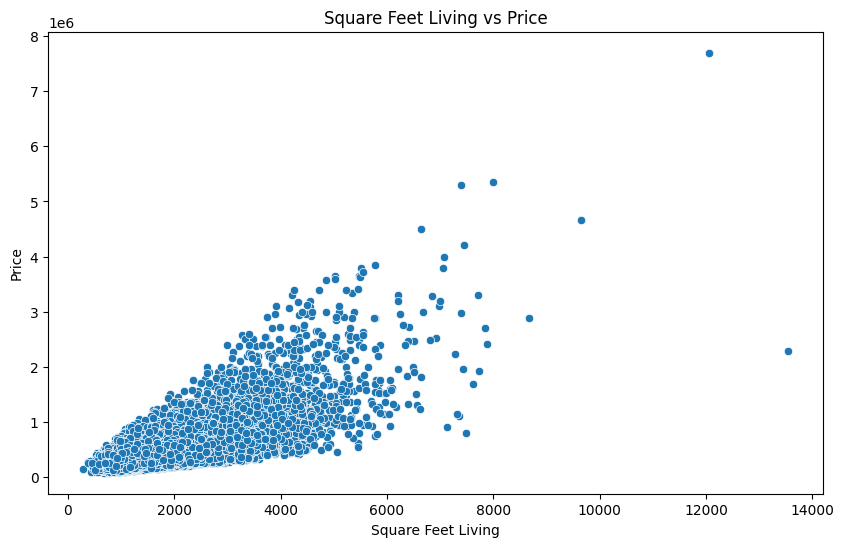

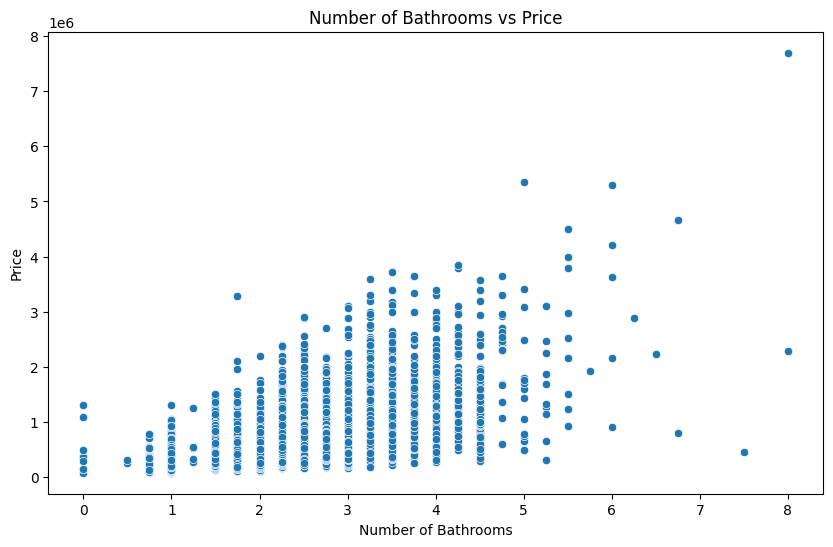

In [ ]:

import seaborn as sns
houses = pd.read_csv("kc_house_data_train.csv")

# Display the first few lines of the dataset
print("First few lines of the dataset:")
print(houses.head())

# Explore the statistics of the dataset
print("\nStatistics of the dataset:")
print(houses.describe())

# Create scatterplot: sqft_living x price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=houses)
plt.title('Square Feet Living vs Price')
plt.xlabel('Square Feet Living')
plt.ylabel('Price')
plt.show()

# Create scatterplot: bathrooms x price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bathrooms', y='price', data=houses)
plt.title('Number of Bathrooms vs Price')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.show()

### Scikit-learn

We will use the popular [scikit-learn](https://scikit-learn.org/) library to develop machine learning models.
A brief summary of the library can be found [here](https://machinelearningmastery.com/a-gentle-introduction-to-scikit-learn-a-python-machine-learning-library/).
For those who want to get to know the library better, I suggest starting at the [official site](https://scikit-learn.org/), where you will find detailed documentation that also includes a number of tutorials.

Of course, this is not the only library for machine learning. Very trendy libraries at the moment are [Tensorflow](https://www.tensorflow.org/) and [Keras](https://keras.io/), but we don't have enough time to explore them in this class :)

### Simple regression model

**Task 2**: Let's start by preparing some simple regression models in which we predict the price based on one parameter of the house.
1. To begin, split the set of houses in proportions: 67% for the learning set and 33% for the test set using the [`model_selection.train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function.
1. The code to fit the model to the data has already been prepared below. Run it for two different variables (`bathrooms` and `sqft_living`) (if you want to know more about LinearRegression, check the docs: [`linear_model.LinearRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)). As a result, you will get 2 linear regression models.
1. For both, use the [`linear_model.LinearRegression.predict()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict) function on the `houses_test` set to determine the prices estimated by the model.
1. Finally, use the [`metrics.mean_squared_error()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) function to calculate the prediction error on the test set for each model.
1. Compare the achieved performance.

In [ ]:

from sklearn.model_selection import train_test_split

houses_train, houses_test = train_test_split(houses, test_size=0.33, random_state=42)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics
import numpy as np
import bokeh.plotting

regr_model_bathrooms = linear_model.LinearRegression()

# Fit the model to the data (x = bathrooms, y = price)
regr_model_bathrooms.fit(houses_train['bathrooms'].values.reshape(-1,1), houses_train['price'])

# Get the parameters for the regression: y = t1 * x + t0
theta_1_bathrooms = regr_model_bathrooms.coef_[0]
theta_0_bathrooms = regr_model_bathrooms.intercept_

# Visualize the results - data points
bf = bokeh.plotting.figure(width=1000, height=400,
                           title="Model for: bathrooms")
bf.scatter(houses_train['bathrooms'], houses_train['price'])

# Visualize the results - regression
x = np.linspace(0, max(houses_train['bathrooms']), 100)
y = theta_1_bathrooms * x + theta_0_bathrooms
bf.line(x, y, legend_label="Regression", color='green')

# Show the final plot
bokeh.plotting.show(bf)

# Predict prices using the test set for the bathrooms model
predicted_prices_bathrooms = regr_model_bathrooms.predict(houses_test['bathrooms'].values.reshape(-1, 1))

# Calculate mean squared error for the bathrooms model
mse_bathrooms = metrics.mean_squared_error(houses_test['price'], predicted_prices_bathrooms)

# Second Linear Regression Model: Sqft_living
regr_model_sqft_living = linear_model.LinearRegression()

# Fit the model to the data (x = sqft_living, y = price)
regr_model_sqft_living.fit(houses_train['sqft_living'].values.reshape(-1,1), houses_train['price'])

# Get the parameters for the regression: y = t1 * x + t0
theta_1_sqft_living = regr_model_sqft_living.coef_[0]
theta_0_sqft_living = regr_model_sqft_living.intercept_

# Visualize the results - data points
sl = bokeh.plotting.figure(width=1000, height=400,
                           title="Model for: sqft_living")
sl.scatter(houses_train['sqft_living'], houses_train['price'])

# Visualize the results - regression
x = np.linspace(0, max(houses_train['sqft_living']), 100)
y = theta_1_sqft_living * x + theta_0_sqft_living
sl.line(x, y, legend_label="Regression", color='green')

# Show the final plot
bokeh.plotting.show(sl)

# Predict prices using the test set for the sqft_living model
predicted_prices_sqft_living = regr_model_sqft_living.predict(houses_test['sqft_living'].values.reshape(-1, 1))

# Calculate mean squared error for the sqft_living model
mse_sqft_living = metrics.mean_squared_error(houses_test['price'], predicted_prices_sqft_living)

# Compare the achieved performance
print("Mean Squared Error for Bathrooms Model:", mse_bathrooms)
print("Mean Squared Error for Sqft_living Model:", mse_sqft_living)

Mean Squared Error for Bathrooms Model: 97351091552.43228
Mean Squared Error for Sqft_living Model: 68453945700.311295


### Multiple regression

Note that the models we have created so far are very inaccurate.
Even the graph shows that the model is a straight line, while some relationships are rather polynomial (e.g., `price` by `bedrooms`).
The introduction of more dimensions may allow for more accurate prediction.

**Task 3**: Prepare **one** model using two variables (`sqft_living` and `bedrooms`) as predictors (`X` matrix in [`fit()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit)).

Is this model better than the previous one?

In [ ]:
regr_model_sqft_bedrooms = linear_model.LinearRegression()

# Prepare the predictor matrix (X) with two variables: sqft_living and bedrooms
X_train = houses_train[['sqft_living', 'bedrooms']]

# Fit the model to the data (X = sqft_living and bedrooms, y = price)
regr_model_sqft_bedrooms.fit(X_train, houses_train['price'])

# Predict prices using the test set for the sqft_living and bedrooms model
X_test = houses_test[['sqft_living', 'bedrooms']]
predicted_prices_sqft_bedrooms = regr_model_sqft_bedrooms.predict(X_test)

# Calculate mean squared error for the sqft_living and bedrooms model
mse_sqft_bedrooms = metrics.mean_squared_error(houses_test['price'], predicted_prices_sqft_bedrooms)

# Compare the achieved performance
print("Mean Squared Error for Sqft_living and Bedrooms Model:", mse_sqft_bedrooms)

Mean Squared Error for Sqft_living and Bedrooms Model: 66699590459.47006


**Task 4**: Use **all** the (numerical) features available in the dataset (except the `price`). Compare this model with models from previous tasks. Is it better?
Remember, we always test the model on a test set (`houses_test`).

In [ ]:
# Selecting all numerical features except price
numerical_features = houses.select_dtypes(include=['int64', 'float64']).columns.drop('price')

# Prepare the predictor matrix (X) with all numerical features except price
X_train_all = houses_train[numerical_features]

# Initialize and fit the linear regression model
regr_model_all_features = linear_model.LinearRegression()
regr_model_all_features.fit(X_train_all, houses_train['price'])

# Predict prices using the test set for the model with all numerical features
X_test_all = houses_test[numerical_features]
predicted_prices_all_features = regr_model_all_features.predict(X_test_all)

# Calculate mean squared error for the model with all numerical features
mse_all_features = metrics.mean_squared_error(houses_test['price'], predicted_prices_all_features)

# Compare the achieved performance with previous models
print("Mean Squared Error for Model with All Numerical Features:", mse_all_features)


Mean Squared Error for Model with All Numerical Features: 40196234277.051506


## Advanced Regression

*This part of the notebook presents more advanced topics and is optional.*

### Artificial features

Sometimes it may not be necessary to add more features at all.
It is possible to create your own features based on existing ones!
Most often these are polynomial features.
E.g., `sqft_living` can be pluralized by adding successively `sqft_living^2`, `sqft_living^3`, `sqft_living^4`, ...

**Task 5**: Write a function with the following signature that generates artificial polynomial features:

``` python
def poly_features(dataframe, feature, degree):
  """
  @param dataframe: pd.DataFrame with dataset
  @param feature: string with feature name for polynomials generation.
                  It should correspond to one of the columns in the dataframe
  @param degree: maximal polynolmial degree to generate,
                 e.g., degree=3 will add 2 columns to the dataframe:
                 feature_2 (feature^2), feature_3 (feature^3)
  @return datafame with additional columns
  """
  
```

In [ ]:
import pandas as pd

def poly_features(dataframe, feature, degree):
    """
    @param dataframe: pd.DataFrame with dataset
    @param feature: string with feature name for polynomials generation.
                    It should correspond to one of the columns in the dataframe
    @param degree: maximal polynomial degree to generate,
                    e.g., degree=3 will add 2 columns to the dataframe:
                    feature_2 (feature^2), feature_3 (feature^3)
    @return dataframe with additional columns
    """
    new_dataframe = dataframe.copy()

    for i in range(2, degree + 1):
        new_column_name = f"{feature}_{i}"
        new_dataframe[new_column_name] = dataframe[feature] ** i

    return new_dataframe

# Example usage:
# new_data = poly_features(dataframe, 'sqft_living', 3)
# This will generate new columns in the dataframe for sqft_living^2 and sqft_living^3


**Task 6**: Use the written function to create a model based solely on `sqft_living` and its powers.
1. Visualize the model (despite the high degree of the polynomial it is still 2D).
1. Store the results (`mean_quared_error`) for different powers in a list.
1. Visualize the relationship of `mean_squared_error` with the number of polynomial features.
1. Do more features always lead to improved model performance?
  

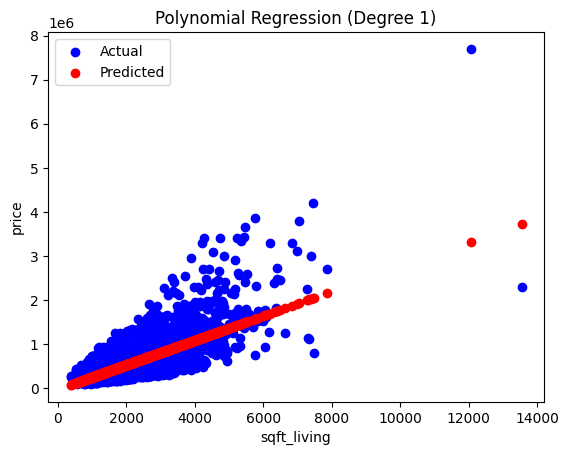

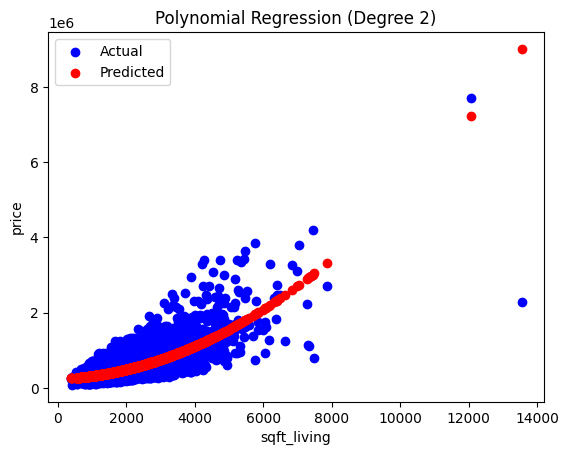

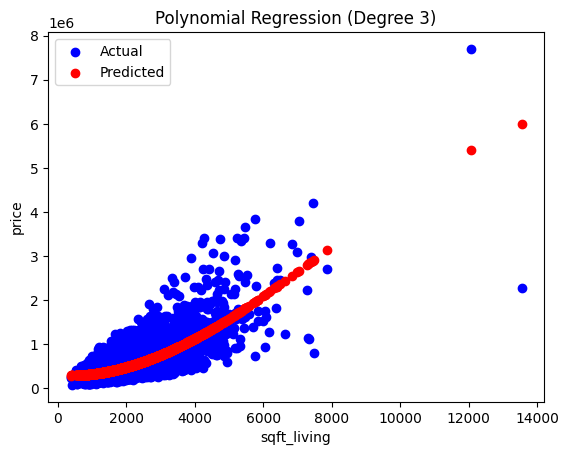

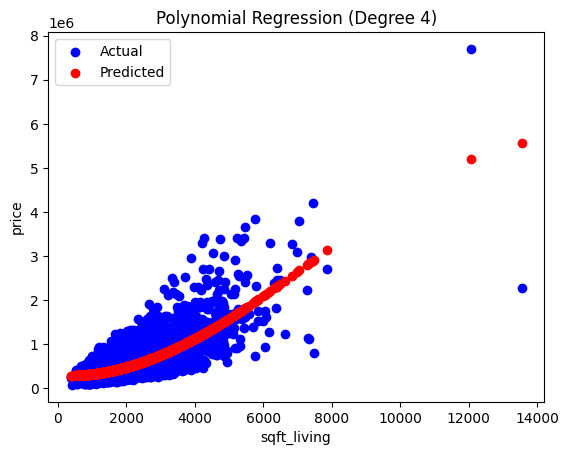

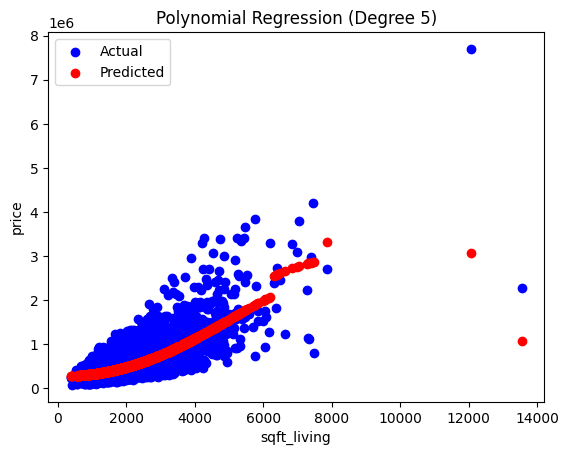

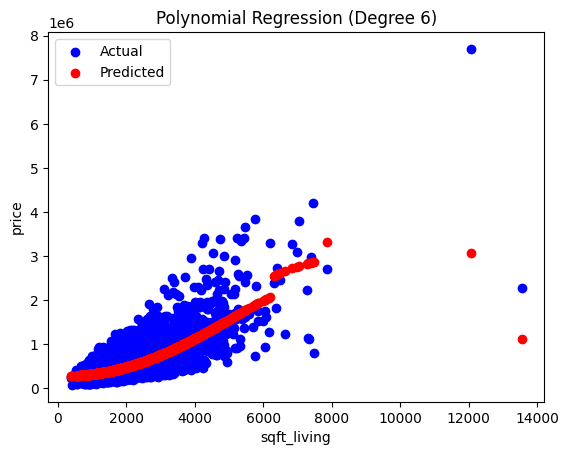

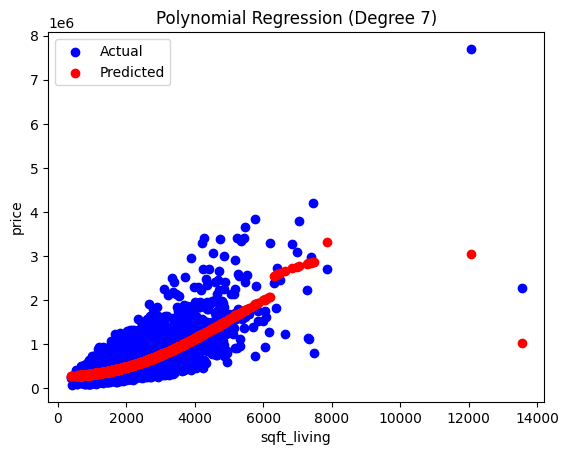

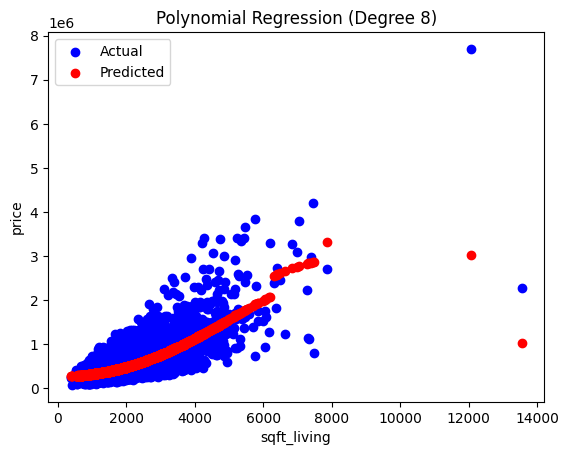

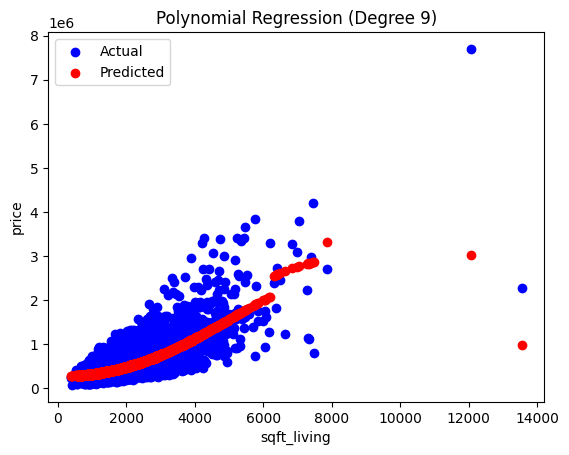

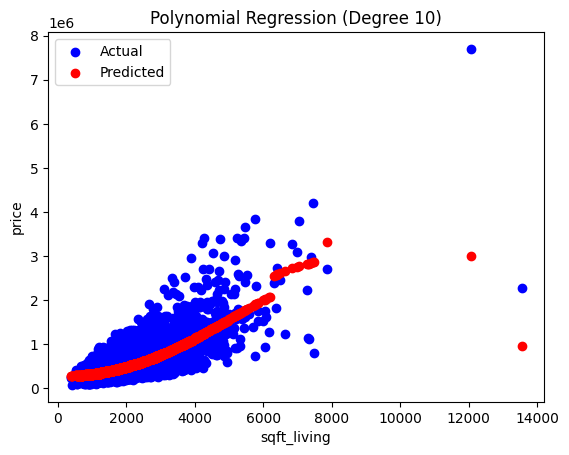

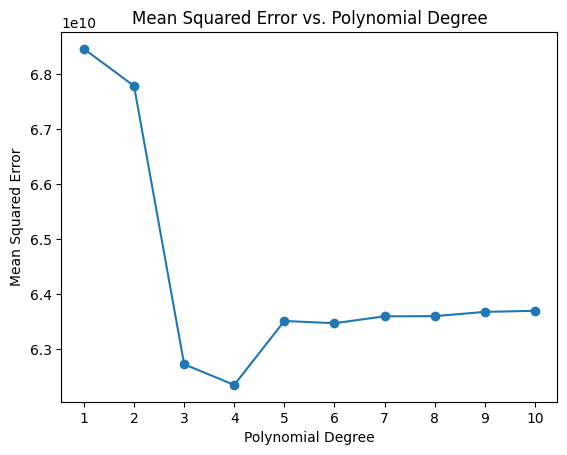

In [ ]:
import matplotlib.pyplot as plt

# Function to train and visualize polynomial regression model
def train_and_visualize_polynomial_model(dataframe, feature, target, max_degree):
    mse_list = []  # To store mean squared error for different degrees

    # Train models with different polynomial degrees
    for degree in range(1, max_degree + 1):
        # Generate polynomial features
        poly_df = poly_features(dataframe, feature, degree)

        # Split dataset into train and test sets
        train_set, test_set = train_test_split(poly_df, test_size=0.33, random_state=42)

        # Train linear regression model
        regr_model = linear_model.LinearRegression()
        regr_model.fit(train_set[[feature] + [f"{feature}_{i}" for i in range(2, degree + 1)]], train_set[target])

        # Predict on test set
        predicted_prices = regr_model.predict(test_set[[feature] + [f"{feature}_{i}" for i in range(2, degree + 1)]])

        # Calculate mean squared error
        mse = metrics.mean_squared_error(test_set[target], predicted_prices)
        mse_list.append(mse)

        # Visualize the model
        plt.scatter(test_set[feature], test_set[target], color='blue', label='Actual')
        plt.scatter(test_set[feature], predicted_prices, color='red', label='Predicted')
        plt.title(f"Polynomial Regression (Degree {degree})")
        plt.xlabel(feature)
        plt.ylabel(target)
        plt.legend()
        plt.show()

    # Visualize the relationship of mean squared error with the number of polynomial features
    degrees = list(range(1, max_degree + 1))
    plt.plot(degrees, mse_list, marker='o')
    plt.title("Mean Squared Error vs. Polynomial Degree")
    plt.xlabel("Polynomial Degree")
    plt.ylabel("Mean Squared Error")
    plt.xticks(degrees)
    plt.show()

# Call the function
train_and_visualize_polynomial_model(houses, 'sqft_living', 'price', 10)


**Task 7**: Choose the best model from the existing ones and test it on a test set (`kc_house_data_test.csv`, not used yet).
* Even if the results are poor, do not change the parameters of the model to improve the result. Why is this important?

In [ ]:
# Load the test dataset
testset = pd.read_csv("kc_house_data_test.csv")

# Choose the best-performing model
# Based on previous tasks, let's say the model with all numerical features performed the best

# Prepare predictor matrix for the test set with all numerical features except price
X_test_all = testset[numerical_features]

# Predict prices using the chosen model
predicted_prices_test = regr_model_all_features.predict(X_test_all)

# Calculate mean squared error for the test set
mse_test = metrics.mean_squared_error(testset['price'], predicted_prices_test)

print("Mean Squared Error on Test Set:", mse_test)


Mean Squared Error on Test Set: 44851842785.934265


### Beyond "standard" linear regression

1. In classical linear regression, the coefficients can have large values + there is a risk of overfitting. To prevent this, improved models have been developed.  
They can be developed with [`linear_model.SGDRegressor()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) function.
   * *Ridge Regression* (L2 regularization)
   * *Lasso Regression* (L1 regularization)
   * *Elastic Net* (a hybrid combining both approaches)
2. A global model (one for the entire space) is not always best - sometimes it is better to build a local model. That approach is exemplified by the *k-Nearest Neighbour* regression.
3. Remember:
   * The model only takes into account features that are in the dataset, and the dependent variable may be affected by something we did not measure.
   * Algorithms are sensitive to correlations between features - if there is a group of highly correlated features, algorithms tend to choose arbitrarily - and other correlated features may be affected (e.g., removed from the model as not important)! It is worth checking correlations between features before interpretation!

